# Exponential moving averages visualization for understanding momentum gradient descent

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider
# plt.style.use('dark_background')

In [2]:
def update_plot(change):
    ema_line.set_data(range, get_EMA_list(y_scatter, beta=slider.value))

def get_EMA_list(list, beta=0.9):
    ema_list = [0]
    for idx, val in enumerate(list):
        current = beta * ema_list[idx-1] + (1-beta) * val
        ema_list.append(current)
    
    del ema_list[-1]
    return ema_list
    

In [26]:
slider = FloatSlider(value=0.95, min=0.8, max=0.999, step=0.001, description='beta')
slider.observe(update_plot, 'value')

<IPython.core.display.Javascript object>


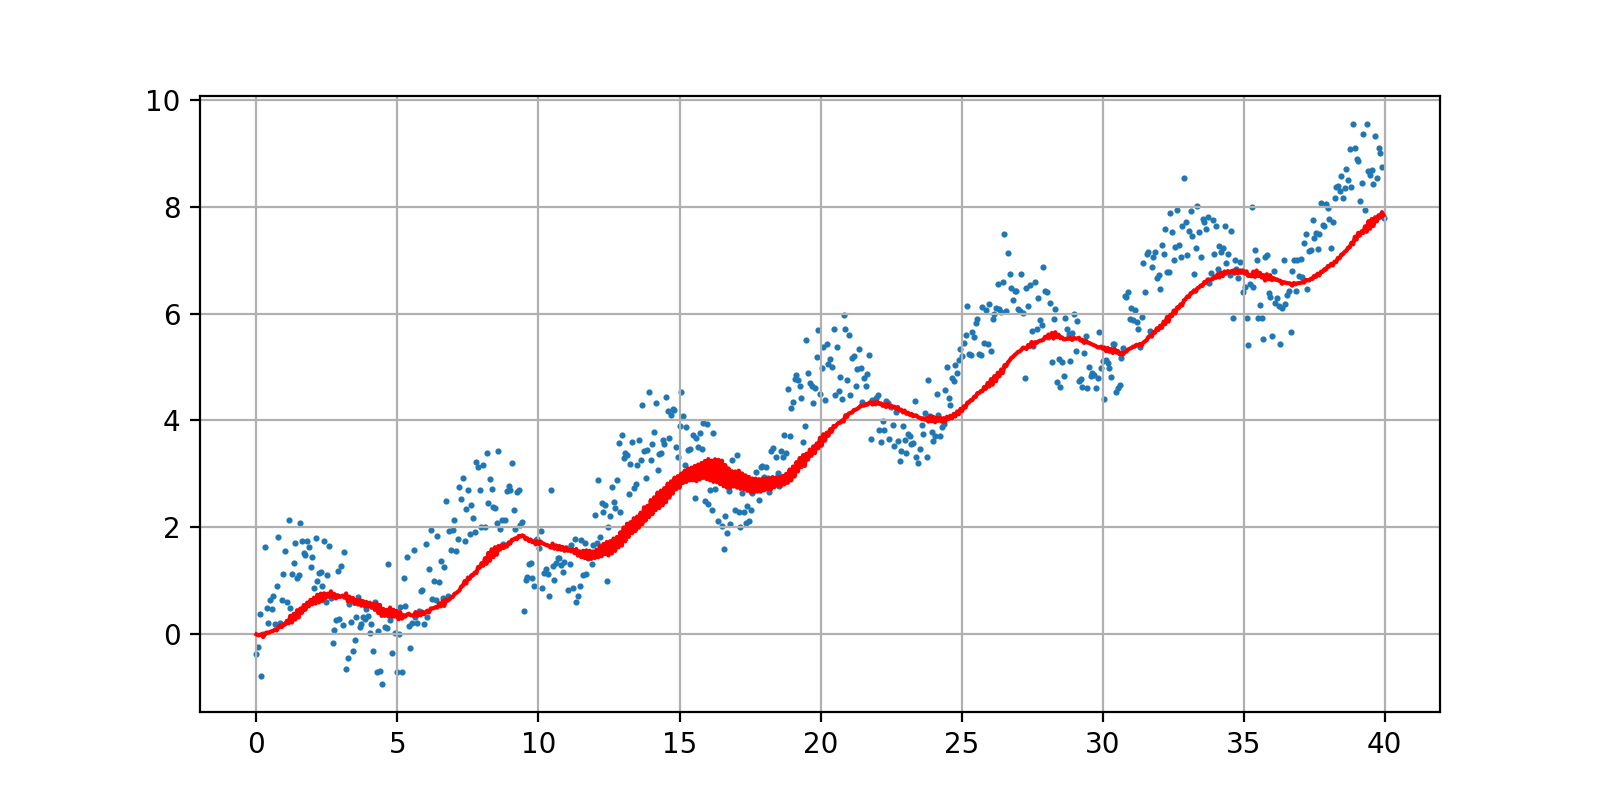

FloatSlider(value=0.95, description='beta', max=0.999, min=0.8, step=0.001)

In [27]:
fig = plt.figure(figsize=(8, 4), num='Interactive plot')
ax = fig.add_subplot(111)
m = 40
step = 0.06
range = np.arange(0, m, step)
y_scatter = (np.sin(range) + range/5) + np.random.randn(len(range)) / 2
ax.scatter(range, y_scatter, s=1.5)

# todo: specify how many prev values count as parameter by slider
y_EMA = get_EMA_list(y_scatter, beta=.95)

ema_line, = ax.plot(range, y_EMA, c='r')
ax.grid()

slider